# Título: Lectura de video y extracción cuadros generando un archivo PNG por cada cuadro<BR>

---
<br />
<div class="alert alert-info" role="alert">
<p><strong>Lectura de video y extracción cuadros</strong></p>
<p><strong>Autor</strong>: Daniel Ivan Medina Barreras</p>
<p><strong>Fecha</strong>: 20200730</p>
<p></p>
<p><strong>Referencia</strong>: gg20200323_1500_SoloCaras_PNGXCuadros.ipynb</p>
<p> <strong>Descripción</strong> :  Se realiza el analisis de cuadros de un video para saber que imagenes tienen mejores rostros</p>



</div>

### **Imutils**
---
**Instalación**

>``pip install imutils``

**Descripción**

Contiene una serie de funciones convenientes para hacer funciones básicas de procesamiento de imágenes, como traducción, rotación, cambio de tamaño, esqueletización, visualización de imágenes Matplotlib, clasificación de contornos, detección de bordes y mucho más fácil con OpenCV y Python 3

**Link**

[imutils](https://pypi.org/project/imutils/)

In [1]:
import imutils

### **Matplotlib** 
---

**Instalación**

>``conda install -c conda-forge -y matplotlib``

**Descripción**

Matplotlib es una biblioteca para la generación de gráficos a partir de datos contenidos en listas o arreglos en el lenguaje de programación Python y su extensión matemática NumPy. 

Por medio del comando mágico **%matplotlib inline** se indica que los despliegues gráficos de la biblioteca matplotlib se despliegan en el cuaderno Jupyter directamente.

**Link**

[Matplotlib](https://matplotlib.org/)

In [2]:
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

### **Numpy**
---
**Instalación**

>``conda install -c anaconda -y numpy``

**Descripción**

Numpy es una biblioteca para el lenguaje de programación Python que (entre otras cosas) brinda soporte para grandes matrices multidimensionales.

¿Por qué es eso importante? Usando NumPy, podemos expresar imágenes como matrices multidimensionales.

Representar imágenes como matrices NumPy no solo es computacional y eficiente en el uso de recursos, sino que muchas otras bibliotecas de procesamiento de imágenes y aprendizaje automático también usan representaciones de matrices NumPy. Además, al usar las funciones matemáticas de alto nivel incorporadas de NumPy, podemos realizar rápidamente análisis numéricos en una imagen.

**Link**

[Numpy](https://numpy.org/)

In [4]:
import numpy as np

### **cv2, OpenCV**
---
**Instalación**

>``pip install opencv-python``

**Descripción**

OpenCV (Open Source Computer Vision Library) es una biblioteca de software de visión artificial y aprendizaje automático de código abierto. OpenCV se creó para proporcionar una infraestructura común para aplicaciones de visión por computadora y para acelerar el uso de la percepción de máquinas en los productos comerciales. 

La biblioteca tiene más de 2500 algoritmos optimizados, que incluyen un conjunto integral de algoritmos de visión por computadora y aprendizaje automático tanto clásicos como de última generación. Estos algoritmos se pueden usar para detectar y reconocer caras, identificar objetos, clasificar acciones humanas en videos, rastrear movimientos de cámara, rastrear objetos en movimiento, extraer modelos 3D de objetos, producir nubes de puntos 3D desde cámaras estéreo, unir imágenes para producir una alta resolución imagen de una escena completa, encuentre imágenes similares de una base de datos de imágenes, elimine los ojos rojos de las imágenes tomadas con flash, siga los movimientos de los ojos, reconozca los paisajes y establezca marcadores para superponerlos con realidad aumentada, etc.

**Link**

[Open CV](https://opencv.org/about/)

In [5]:
import cv2

### **dlib**
---
**Instalación de dlib**

>``pip install dlib``

**Descripción**

Dlib es un moderno kit de herramientas de C ++ que contiene algoritmos de aprendizaje automático y herramientas para crear software complejo en C ++ para resolver problemas del mundo real. Se utiliza tanto en la industria como en la academia en una amplia gama de dominios, que incluyen robótica, dispositivos integrados, teléfonos móviles y grandes entornos informáticos de alto rendimiento. Las licencias de código abierto de Dlib le permiten usarlo en cualquier aplicación, de forma gratuita.

**Requiere intalación de cmake**

**Instalación de cmake**

**pip install cmake**

**Link dlib**

[dlib](http://dlib.net/)

In [6]:
import dlib

### **glob - Coincidencia de patrón de nombre de archivo**
---
**Instalación**

>``pip install glob2``

**Descripción**

Es útil en cualquier situación donde un programa necesita buscar una lista de archivos en el sistema de archivos con nombres que coinciden con un patrón. Para crear una lista de nombres de archivos que tengan una cierta extensión, prefijo, o cualquier cadena común en el medio, usa glob en lugar de escribir código personalizado para escanear los contenidos del directorio.

**Link**

[glob](https://rico-schmidt.name/pymotw-3/glob/)

In [7]:
import glob

### Librerías estándar de Python
---
**Descripción**

La instalación básica de Python viene con una muy completa librería de módulos para todo tipo de tareas, incluyendo acceso a ficheros y directorios, compresión de ficheros, ejecución recurrente (multihilo), email, html, xml, csv y un largo etcétera.

**Link**

[La biblioteca estándar de Python](https://docs.python.org/3/library/index.html)

In [8]:
import os
from os import path

### shutil
---
**Instalación**

>``pip install pytest-shutil``

**Descripción**

Esta biblioteca es un paquete de herramientas de gestión de entorno y shell de Unix para pruebas automatizadas.

**rmtree**

Elimina un árbol de directorios completo; la ruta debe apuntar a un directorio (pero no a un enlace simbólico a un directorio). Si ignore_errors es verdadero, los errores resultantes de eliminaciones fallidas serán ignorados; si es falso u omitido, dichos errores se manejan llamando a un controlador especificado por onerror o, si se omite, generan una excepción.

**Link**


In [9]:
from shutil import rmtree

## Inicio
---

Comprobamos la ruta de nuestro proyecto

In [10]:
%%bash

pwd

/home/saxsa/Documentos/face_pro_2/Proyecto


- Se asigna el nombre de la carpeta donde sie guardaran los cuadros del video 
- Se asigna el nombre con el que se guardara el cuadro
- Se asigna la extencion del cuadro, en este caso se guardara en formato png

In [11]:
ggDirectorioDestino = './ggDepositoImagenesCaras'
BaseNombreArchivosCuadros = ggDirectorioDestino + '/Cuadro_'
ExtensionArchivosCuadros = '.png'

>``glob.glob``   

Nos devuelve la lista de todos los archivos **.png** que se encuentran en la carpeta **ggDepositoImagenes**

In [12]:
ggCuadros = glob.glob("./ggDepositoImagenes/**")

Mostramos ls lista de archivos **ggCuadros**

In [13]:
ggCuadros

['./ggDepositoImagenes/Cuadro_0.png',
 './ggDepositoImagenes/Cuadro_1.png',
 './ggDepositoImagenes/Cuadro_2.png',
 './ggDepositoImagenes/Cuadro_3.png',
 './ggDepositoImagenes/Cuadro_4.png',
 './ggDepositoImagenes/Cuadro_5.png',
 './ggDepositoImagenes/Cuadro_6.png',
 './ggDepositoImagenes/Cuadro_7.png',
 './ggDepositoImagenes/Cuadro_8.png',
 './ggDepositoImagenes/Cuadro_9.png',
 './ggDepositoImagenes/Cuadro_10.png',
 './ggDepositoImagenes/Cuadro_11.png',
 './ggDepositoImagenes/Cuadro_12.png',
 './ggDepositoImagenes/Cuadro_13.png',
 './ggDepositoImagenes/Cuadro_14.png',
 './ggDepositoImagenes/Cuadro_15.png',
 './ggDepositoImagenes/Cuadro_16.png',
 './ggDepositoImagenes/Cuadro_17.png',
 './ggDepositoImagenes/Cuadro_18.png',
 './ggDepositoImagenes/Cuadro_19.png',
 './ggDepositoImagenes/Cuadro_20.png',
 './ggDepositoImagenes/Cuadro_21.png',
 './ggDepositoImagenes/Cuadro_22.png',
 './ggDepositoImagenes/Cuadro_23.png',
 './ggDepositoImagenes/Cuadro_24.png',
 './ggDepositoImagenes/Cuadro_25.pn

Con ``len`` calculamos el número de cuandros que tenemos en **ggCuadros** y lo mostramos

In [14]:
NumCuadrosEnVideo = len(ggCuadros)

In [15]:
ConjuntoCuadrosVideo = []


for key in range(0 , NumCuadrosEnVideo):
    image = cv2.imread(ggCuadros[key])
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    ConjuntoCuadrosVideo.append(image)

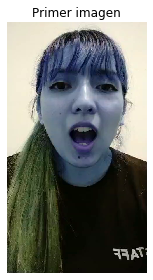

In [16]:
# Imagen original
plt.imshow(ConjuntoCuadrosVideo[0], cmap='gray') 
plt.axis('off')
plt.title('Primer imagen');
plt.tight_layout()

### Creamos estructura de las carpetas

No es recomendable borrar tus datos, pero en este caso se borran las imágenes para no tener cruce entre el análisis de un video y otro  
Si existe la carpeta la borramos

In [25]:
if path.exists(ggDirectorioDestino):
    rmtree(ggDirectorioDestino)

Si no existe la carpeta la crea 

In [26]:
try:
    os.stat(ggDirectorioDestino)
except:
    os.mkdir(ggDirectorioDestino)

In [19]:
%%bash

pwd

ls -ltr ./ggDepositoImagenesCaras

/home/saxsa/Documentos/face_pro_2/Proyecto
total 0


In [20]:
cascade_dir = "./haarcascade_frontalface_default.xml"
face_cascade = cv2.CascadeClassifier(cascade_dir)

### Almacenamiento de cada cuadro con una buena toma de rostro en un archivo gráfico
---

In [21]:
for key in range(0, len(ConjuntoCuadrosVideo)):

    img = ConjuntoCuadrosVideo[key] 
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
    
    
    face = face_cascade.detectMultiScale(
        gray,
        scaleFactor=1.755,
        minNeighbors=8,
        minSize=(30, 30)
    )     
    
    if len(face) == 1:
        cv2.imwrite(BaseNombreArchivosCuadros + str(key) + ExtensionArchivosCuadros,ConjuntoCuadrosVideo[key] )

In [22]:
%%bash

pwd

echo 'Total de archivos de los cuadros del video'

ls  ./ggDepositoImagenes/ | wc -l 

/home/saxsa/Documentos/face_pro_2/Proyecto
Total de archivos de los cuadros del video
231


In [23]:
%%bash

pwd

echo 'Total de archivos de los cuadros del video con buena toma de un rostro'

ls  ./ggDepositoImagenesCaras/ | wc -l 

/home/saxsa/Documentos/face_pro_2/Proyecto
Total de archivos de los cuadros del video con buena toma de un rostro
57


In [24]:
%%bash

pwd

ls -ltr ./ggDepositoImagenesCaras/ 

/home/saxsa/Documentos/face_pro_2/Proyecto
total 31620
-rw-rw-r--. 1 saxsa saxsa 536829 jul 30 21:16 Cuadro_7.png
-rw-rw-r--. 1 saxsa saxsa 545959 jul 30 21:16 Cuadro_10.png
-rw-rw-r--. 1 saxsa saxsa 551185 jul 30 21:16 Cuadro_11.png
-rw-rw-r--. 1 saxsa saxsa 558635 jul 30 21:16 Cuadro_12.png
-rw-rw-r--. 1 saxsa saxsa 562622 jul 30 21:16 Cuadro_13.png
-rw-rw-r--. 1 saxsa saxsa 566812 jul 30 21:16 Cuadro_14.png
-rw-rw-r--. 1 saxsa saxsa 571105 jul 30 21:16 Cuadro_15.png
-rw-rw-r--. 1 saxsa saxsa 570211 jul 30 21:16 Cuadro_16.png
-rw-rw-r--. 1 saxsa saxsa 568407 jul 30 21:16 Cuadro_18.png
-rw-rw-r--. 1 saxsa saxsa 572042 jul 30 21:16 Cuadro_27.png
-rw-rw-r--. 1 saxsa saxsa 577111 jul 30 21:16 Cuadro_28.png
-rw-rw-r--. 1 saxsa saxsa 523043 jul 30 21:16 Cuadro_30.png
-rw-rw-r--. 1 saxsa saxsa 542616 jul 30 21:16 Cuadro_31.png
-rw-rw-r--. 1 saxsa saxsa 550935 jul 30 21:16 Cuadro_32.png
-rw-rw-r--. 1 saxsa saxsa 555029 jul 30 21:16 Cuadro_33.png
-rw-rw-r--. 1 saxsa saxsa 560326 jul 30 21:16 

---
## Si te sirvio, <font color='brown'>COMPARTE!</font> 

- Adios